<div class="alert alert-block alert-info">
<center>Métodos Numericos</center>
<center>LISTA 4a</center>
<center>ALUNO: João Pedro de Sousa Corrêa</center>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<h4>1. Implemente o método da Bisseção descrito pelo algoritmo 1.1 no texto. Para testar o algoritmo,
use os exemplos do material textual.</h4>
</div>

In [2]:
def bissecao(f, a, b, tol=1e-10):
    erro, x_ant = 1, a
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a+0.5*(b-a)
            if f(x) == 0:     
                return x            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant))/np.abs(x)
        x_ant = x
    
    return x

In [24]:
def f(x):
    return np.exp(-x)+0.5
def f1(x):
    return np.cos(x)
def g(x):
    return f(x)-f1(x)

In [25]:
bissecao(g,-1,7)

5.242105934303254

<div class="alert alert-block alert-info">
<h4>2. Determine as raízes reais de $f(x) = −0.5x^2 + 2.5x + 4.5$:</h4>
<p>(a) Graficamente;</p>
<p>(b) Usando a fórmula quadrática;</p>
<p>(c) Usando três iterações do método da bisseção para determinar a maior raiz. Use as aproximações iniciais $x_l = 5$ e $x_u = 10$. Calcule o erro relativo obtido entre cada iteração, e o erro
entre os valores verdadeiros encontrados no item b e o valor de cada iteração.</p>
</div>

In [6]:
def f(x):
    return -0.5*x**2+2.5*x+4.5

<h4>a)

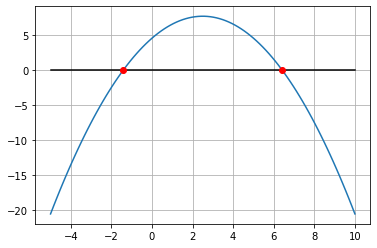

In [7]:
x = np.linspace(-5, 10, 100)
k = np.arange(-5, 0)
plt.plot([-5,10],[0,0],'black')
plt.plot(x,f(x),[bissecao(f,-2,0),bissecao(f,6,7)],[0,0],'ro')
plt.grid()

<h4>b)

In [8]:
coeficientes = [-0.5,2.5,4.5]
np.roots(coeficientes)

array([ 6.40512484, -1.40512484])

<h4>c)

In [9]:
def bissecaoInteracao(f, a, b,interacao = 200):
    erro, x_ant = 1, a
    cont = 0
    
    while(cont<interacao):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a+0.5*(b-a)
            if f(x) == 0:
                
                print('A raíz é ', x)   
                print("Erro relativo = ",np.abs((x - x_ant)/x),"Valor da interação = ",x)#erro relativo obtido entre cada iteração
                return x,np.abs((x - x_ant)/x)
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
        cont+=1;
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        print(cont,"º Erro relativo = ", erro,"\nValor da interação = ", x)#erro relativo obtido entre cada iteração
    return x #Maior raiz

In [10]:
bissecaoInteracao(f,5,10,3)

1 º Erro relativo =  0.3333333333333333 
Valor da interação =  7.5
2 º Erro relativo =  0.2 
Valor da interação =  6.25
3 º Erro relativo =  0.09090909090909091 
Valor da interação =  6.875


6.875

<h5>Erro relativo da primeira interação com o resultado da letra b.

In [11]:
erro1 = np.abs( 7.5-6.40512484)/ 7.5
erro1

0.14598335466666665

<h5>Erro relativo da segunda interação com o resultado da letra b.

In [12]:
erro2 = np.abs(6.25-6.40512484)/ 6.25
erro2

0.024819974400000007

<h5>Erro relativo da terceira interação com o resultado da letra b.

In [13]:
erro3 = np.abs((6.875-6.40512484)/6.875)
erro3

0.06834547781818182

<div class="alert alert-block alert-info">
3. Localize a primeira raiz não-trivial de $\sin x = x^3$
, onde x está em radianos. Use uma técnica
gráfica e a bisseção com o intervalo inicial de 0,5 a 1. Faça os cálculos até que o erro seja inferior
a 2%.
</div>




In [14]:
def f(x):
    return x**3
def g(x):
    return np.sin(x)

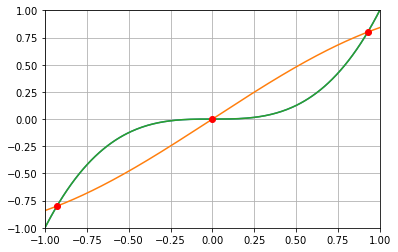

In [15]:
x = np.linspace(-5, 3, 1000)


plt.plot(x,f(x))
plt.plot(x,g(x))

plt.plot(x,f(x),[-0.93,0,0.93],[-0.80,0,0.80],'ro')

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.grid()

In [16]:
def h(x):
    return g(x)-f(x)


bissecao(h,0.5,1,2e-2)


0.921875

<div class="alert alert-block alert-info">
4. Dada $f(x) = −2x^6 − 1.5x^4 + 10x + 20$, encontre o máximo dessa função ( $f
'(x) = 0)$ usando o
método da bisseção, considerando o intervalo [0, 1] e um erro limite de 5%.

</div>




In [17]:
def f(x):
    return (-2*(x**6))-(1.5*(x**4))+(10*x)+20
def fi(x):
    return -12*x**5-6*x**3+10

In [18]:
bissecao(fi,0,1,5e-2)

0.84375

<div class="alert alert-block alert-info">
<h4>
<p>5. Embora a bisseção seja uma técnica perfeitamente válida para determinar raízes, sua abordagem
do tipo “força bruta” é relativamente ineficiente. A falsa posição é uma alternativa baseada na
percepção gráfica.</p>
<p>Uma deficiência do método da bisseção é que, na divisão do intervalo de $x_l$ a $x_u$ em metades
iguais, não são levados em conta os módulos de $f (x_l
)$ e $f (x_u
).$ Por exemplo, se $f (x_l
) $estiver
muito mais próximo de zero do que $f (x_u
)$, será provável que a raiz esteja mais próxima de $x_l$ que
de $x_u$
.</p>
<p>Um método alternativo que explora essa percepção gráfica é ligar$ f (x_l
)$ e $f (x_u
) $por uma reta.
A intersecção dessa reta com o eixo x representa uma estimativa melhorada da raiz. O fato da
substituição da curva por uma reta dar uma “falsa posição” da raiz é a origem do nome, método
da falsa posição, ou, em latim, regula falsi. Ele também é chamado de método da interpolação
linear. Para esse método, a aproximação da raiz é dada por</p>
$$x^∗ = x_u -\frac{f (x_u)(x_l − x_u)}{f (x_l) − f (x_u)},$$
<p>em que x
∗
é a estimação da raiz na atual iteração, $x_l$ e $x_u$
são, respectivamente, os limites inferior
e superior do intervalo de verificação da raiz e $f (x_l
)$ e $f (x_u
) $são os valores da função para esses
limites.</p>
<p>As bibliotecas numérica do python não trazem uma implementação desse método. Implementeo, teste-o com os exemplos do texto, comparando com o método da bisseção. Mostre que esse
método, para vários casos, é mais eficiente que o da bisseção.</p>
    
</div>





In [19]:
def interpolacao(f, a, b, tol=1e-10):
    erro, x_ant = 1, a
    interacoes = 0
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a-((f(a)*(b-a))/(f(b)-f(a)))
            if f(x) == 0:
                
                print('A raíz é ', x)   
                return [x,interacoes]
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        interacoes+=1
        
    return [x,interacoes]

def bissecao3(f, a, b, tol=1e-10):
    erro, x_ant = 1, a
    interacoes=0
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1: 
            print("Não há raiz nesse intervalo")
            return inf*sup
        else:
            x = a+0.5*(b-a)
            if f(x) == 0:
                
                print('A raíz é ', x)   
                return [x,interacoes]
            
            elif inf*np.sign(f(x)) == -1: b = x
            else: a = x
                
        erro = np.abs((x - x_ant)/x)
        x_ant = x
        interacoes+=1
    
    return [x,interacoes]

In [20]:
#Primeiro teste com a função fi(x)

def fi(x):
    return -12*x**5-6*x**3+10

interacoesFiBiss = bissecao3(fi,0,1)[1]
interacoesFiInter = interpolacao(fi,0,1)[1]



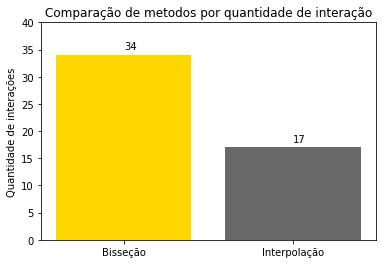

In [21]:
index = np.arange(2)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2],[interacoesFiBiss,interacoesFiInter],color = ['#FFD700','#696969'])

plt.text(2,18,str(interacoesFiInter))
plt.text(1,35,str(interacoesFiBiss))
plt.ylim(0,40)

plt.xticks(index+1, ("Bisseção", "Interpolação"))
plt.ylabel("Quantidade de interações")
plt.show()

In [22]:
#Segundo teste com a função f(x)
def f(x):
    return -0.5*x**2+2.5*x+4.5

interacoesFBiss = bissecao3(f,-2,0)[1]
interacoesFInter = interpolacao(f,-2,0)[1]

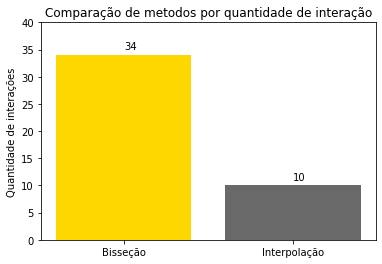

In [23]:
index = np.arange(2)
plt.title("Comparação de metodos por quantidade de interação")
plt.bar([1,2],[interacoesFBiss,interacoesFInter],color = ['#FFD700','#696969'])


plt.text(2,11,str(interacoesFInter))
plt.text(1,35,str(interacoesFBiss))
plt.ylim(0,40)


plt.xticks(index+1, ("Bisseção", "Interpolação"))
plt.ylabel("Quantidade de interações")
plt.show()